# This notebook shows preload_data method applied to a nested zip file

This notebook demonstrates how to preload compressed files from the [https://zenodo.org](https://zenodo.org) webpage, particularly those with a nested file structure spanning multiple levels. The process involves downloading the compressed files, extracting their contents, and making the files accessible for use in the data store as usual.

### Setup
In order to run this notebook, you need to install [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo), following the [README](../README.md).

Note that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [2]:
%%time
from xcube.core.store import new_data_store
from xcube.core.store import get_data_store_params_schema

CPU times: user 3.09 s, sys: 265 ms, total: 3.36 s
Wall time: 1.86 s


First, we get the store parameters needed to initialize a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). 

In [3]:
%%time
store_params = get_data_store_params_schema("zenodo")
store_params

CPU times: user 35.1 ms, sys: 8.49 ms, total: 43.5 ms
Wall time: 61.3 ms


We initiate a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework) for the record https://zenodo.org/records/2575599 with the record ID `root="2575599"`. Note that the `xcube-zenodo` plugin is recognized after installation by setting the first argument to `"zenodo"` in the `new_data_store` function. We can optionally specify the cache data store's ID and parameters using the `cache_store_id` and `cache_store_params` keyword arguments. By default, `cache_store_id` is set to `file`, and `cache_store_params` defaults to `dict(root="zenodo_cache/2575599", max_depth=10)`.

In [4]:
%%time
store = new_data_store("zenodo", root="2575599")

CPU times: user 6.13 ms, sys: 12 μs, total: 6.14 ms
Wall time: 6.17 ms


Compressed files can be preloaded using the `preload_data` method. This approach enables the downloading of compressed files that cannot be lazily loaded, allowing them to be stored and readily available for the duration of the project. Also this method uses `preload_params`, which can be viewed in the next cell.

In [5]:
%%time
preload_params = store.get_preload_data_params()
preload_params

CPU times: user 28 μs, sys: 4 μs, total: 32 μs
Wall time: 34.8 μs


The `preload_data` method returns a store which may be used subsequently to access the preloaded data, as shown in the subsequent cells. If no data IDs are given, all available data in compressed format will be preloaded. Note that the `preload_method` is new and highly experimental. 

In [6]:
cache_store = store.preload_data("VODCA_C-band_2002-2018_v01.0.0.zip")

The data IDs of the preloaded datasets can be viewed using the following line. In this example, the zipped file contains multiple files organized in a nested structure. Each file is written to a Zarr file, and the data ID reflects the original zip file's nested structure, with the file extension adjusted to `.zarr` accordingly.

In [11]:
cache_store.list_data_ids()

['VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-01-07.zarr',
 'VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-09-13.zarr',
 'VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-02-22.zarr',
 'VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-09-29.zarr',
 'VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-03-15.zarr',
 'VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-12-01.zarr',
 'VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-03-08.zarr',
 'VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-06-18.zarr',
 'VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-08-22.zarr',
 'VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-10-29.zarr',
 'VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-10-13.zarr',
 'VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-06-07.zarr',
 'VODCA_C-band_2

Next we want to open one of the datasets. We first view the availbale parameters to open the data. 

In [12]:
%%time
open_params = cache_store.get_open_data_params_schema(
    data_id="VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-01-07.zarr"
)
open_params

CPU times: user 581 μs, sys: 0 ns, total: 581 μs
Wall time: 585 μs


In [14]:
%%time
ds = cache_store.open_data(
    "VODCA_C-band_2002-2018_v01.0.0/C-Band/2011/vodca_v01-0_C-band_2011-01-07.zarr"
)
ds

CPU times: user 7.25 ms, sys: 628 μs, total: 7.88 ms
Wall time: 17 ms


<xarray.Dataset> Size: 25MB
Dimensions:          (lat: 720, lon: 1440, time: 1)
Coordinates:
  * lat              (lat) float64 6kB 89.88 89.62 89.38 ... -89.62 -89.88
  * lon              (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time             (time) datetime64[ns] 8B 2011-01-07
Data variables:
    processing_flag  (time, lat, lon) float64 8MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    sensor_flag      (time, lat, lon) float64 8MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    vod              (time, lat, lon) float64 8MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/29)
    DOI:                       10.5281/zenodo.2575599
    band:                      C-band (6.8 GHz - 7.3 GHZ)
    calendar:                  standard
    contact:                   vodca@geo.tuwien.ac.at
    conventions:               CF-1.6
    creatorname:               Department of Geodesy and Geoinformation, Tech...
    ...                        ...
    spatialresolution:         25 km
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    timecoverageenddate:       2018-12-31T23:59:59
    timecoverageresolution:    P1D
    timecoveragestartdate:     2002-06-19T00:00:00
    title:                     Global long-term Vegetation optical depth clim...

We plot the opened data at the last time step as an example below.

CPU times: user 337 ms, sys: 52.6 ms, total: 390 ms
Wall time: 473 ms


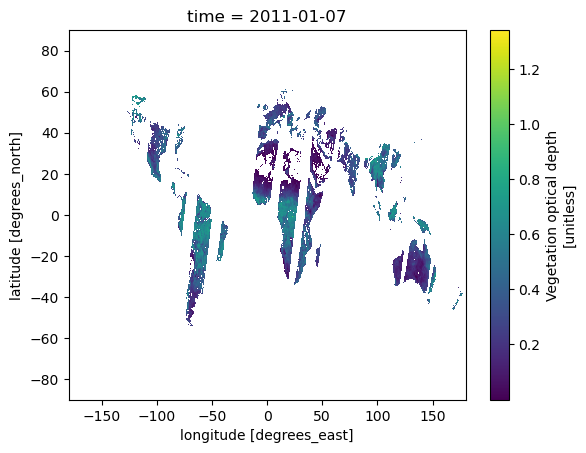

In [15]:
%%time
ds.vod.isel(time=0).plot()